In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.fashion_mnist # obrazki 28x28 w skali szarości

In [4]:
# wczytanie zawartości fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
# AI używa wartości od 0 do 1
# natomiast obrazki mają wartości od 0-255 (rgb) więc normalizujemy je dzieląc wszystkie przez 255

In [17]:
training_images = training_images / 255
test_images = test_images / 255 # później do sprawdzania też wartości od 0-1

In [24]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer = keras.optimizers.Adam(),
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

model.fit(training_images, training_labels, epochs=5, verbose=10)

Train on 60000 samples
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5


In [45]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [46]:
predictions = model.predict(test_images)

[1.0573647e-03 9.9884808e-01 1.9544197e-05 5.4109846e-06 1.5127840e-05
 2.1129419e-10 5.4536027e-05 2.3260756e-11 8.8844274e-09 6.3686530e-12]
Spodnie


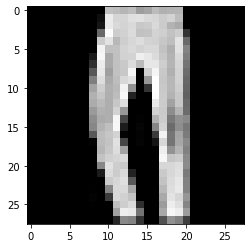

In [64]:
ubrania = ['Koszulka', 'Spodnie', 'Sweter', 'Spódniczka', 'Płaszcz',
               'Sandał', 'Koszula', 'Sneaker', 'Torba', 'But za kostke']
item = 5
x = np.argmax(predictions[item]) # wyświetla największe prawdopodobieństwo
print(predictions[item])
print(ubrania[x])
plt.imshow(test_images[item], cmap="gray")
plt.show()